In [1]:
from IPython.display import Math, HTML, display, Markdown

import cv2
import json
import requests
import pathlib
import shutil
import numpy as np
import pandas as pd
import time
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline

# Scrape Southpark
In this notebook, we're going to download lots of southpark related images which are required to create a southpark avatar generator.  

**Goal**: The goal of this notebook is to download the necessary png-files and store them into an image folder by category.

**Step 1) Getting the images**: Lucky for us, it isn't that hard to find the desired images, The only thing which we've to do is  
making use of the following application: https://southpark.cc.com/avatar .  
In this application we just have to click on all the items in which we are interested in so that we can use them later in our generator.   
When we click on an item, the url of that images will be automatically registrated in an HAR-environment.  
This means, once we've clicked on all our desired items, and their urls stored in a semi *json* file which we can easily download.

(See image)    
<img src="nb_imgs/south_park_avatar_creator.png" style="width:800px; height:532px; margin-left:auto; margin-right:auto">  

Unfortunately for use, it isn't really possible to classify the items directly into categories like: t-shirt, trousers, head, hair ... but more about that in the next section.
  
**Step 2) Download the images** Download the images via *requests* and store them into the correct folder
```  
  
  
```
**url**: https://southpark.cc.com/avatar

```  
  
  
  
  
  
  
```
# Get the URLs 
 - Like mentioned before, the first thing which we’ve to do is clicking on all the items which we need.  
 - The second thing which we’ve to do, is downloading the HAR file.  
 - And thirdly we're going to read in the HAR-file (json) into python

In [2]:
# load the json file
filename = 'items_to_scrape.json'
with open(filename, 'r', encoding="utf-8") as f:
    data = json.load(f)

 - Now that the file has been read into python, we're going to create a dataframe out of it.  


Like mentioned before, we aren't directly able to classify the category of each item (url).  
Nevertheless while I was clicking on the items I tried to create a large pause (in time) between a transition of 2 categories.  
And so, we will use these breaks as an indication for assigning the categories.  

In [3]:
# loop over the json file and store url paths and timestamps
df = []
for e, item in enumerate(data.get('log').get('entries')):
    
    # get the url (if it exists)
    url = item.get('request').get('url')

    # if url is none, go to the next item
    if url is None:
        continue
    
    # if the prop.png and image_bg.png properties does not exist --> go to the next item
    if ('prop.png' in url or 'image_bg.png' in url) == False :
        continue
        
    # create a small dictionary
    d = {"time": item.get('startedDateTime'),
         "url": url,
         "filename": url.rsplit('/',1)[1].rsplit('?',1)[0]}
    
    # store the dictionary
    df.append(d)

# transform the data into a dataframe
df = pd.DataFrame(df)

# minimal etl
df['time'] = pd.to_datetime(df.time)
df = df.sort_values(by='time')
df['time'] = df.time.astype('str')

df.head()

,time,url,filename
0,2020-05-10 14:58:01.164000+02:00,https://avatar.southpark.cc.com/uploads/assets...,6e61cbb4-47c1-11e6-951e-0ad5582a94ed_prop.png
1,2020-05-10 14:58:01.167000+02:00,https://avatar.southpark.cc.com/uploads/assets...,b8872516-63f7-11e6-b595-063e7906d7e5_prop.png
2,2020-05-10 14:58:01.169000+02:00,https://avatar.southpark.cc.com/uploads/assets...,0c077170-4538-11e6-bd11-0ad5582a94ed_prop.png
3,2020-05-10 14:58:01.169000+02:00,https://avatar.southpark.cc.com/uploads/assets...,d9538692-4537-11e6-9abb-0ad5582a94ed_prop.png
4,2020-05-10 14:58:01.169000+02:00,https://avatar.southpark.cc.com/uploads/assets...,3355f028-76be-11e6-92fc-063e7906d7e5_prop.png


### Create one big chain of urls
Now that we've captured all the urls, we're going to create 1 big chain from these urls.  
(Thus, order the *events* by time)  
Last but not least, we’re going to calculate how many seconds it took between 2 images

### New data frame

,time,url,filename,prev_timestamp,diff
876,2020-05-10 15:52:42.411000+02:00,https://avatar.southpark.cc.com/uploads/assets...,e7811d1c-4954-11e6-8937-0ad5582a94ed_prop.png,2020-05-10 15:52:39.148000+02:00,3.263
877,2020-05-10 15:52:44.669000+02:00,https://avatar.southpark.cc.com/uploads/assets...,01ed4be4-4955-11e6-9a73-0ad5582a94ed_prop.png,2020-05-10 15:52:42.411000+02:00,2.258
878,2020-05-10 15:52:47.239000+02:00,https://avatar.southpark.cc.com/uploads/assets...,0f7472b0-4955-11e6-a0b8-0ad5582a94ed_prop.png,2020-05-10 15:52:44.669000+02:00,2.570
879,2020-05-10 15:52:50.038000+02:00,https://avatar.southpark.cc.com/uploads/assets...,21aa9e50-4955-11e6-9a73-0ad5582a94ed_prop.png,2020-05-10 15:52:47.239000+02:00,2.799
880,2020-05-10 15:58:12.978000+02:00,https://avatar.southpark.cc.com/uploads/assets...,b331b2f6-fcf2-11e9-862f-063e7906d7e5_image_bg.png,2020-05-10 15:52:50.038000+02:00,322.940


### Biggest time differences 

,diff
39,386.803
880,322.940
490,209.624
750,181.960
405,167.237
638,147.780
839,135.433
238,111.687
76,109.246
784,79.281


### Timeseries

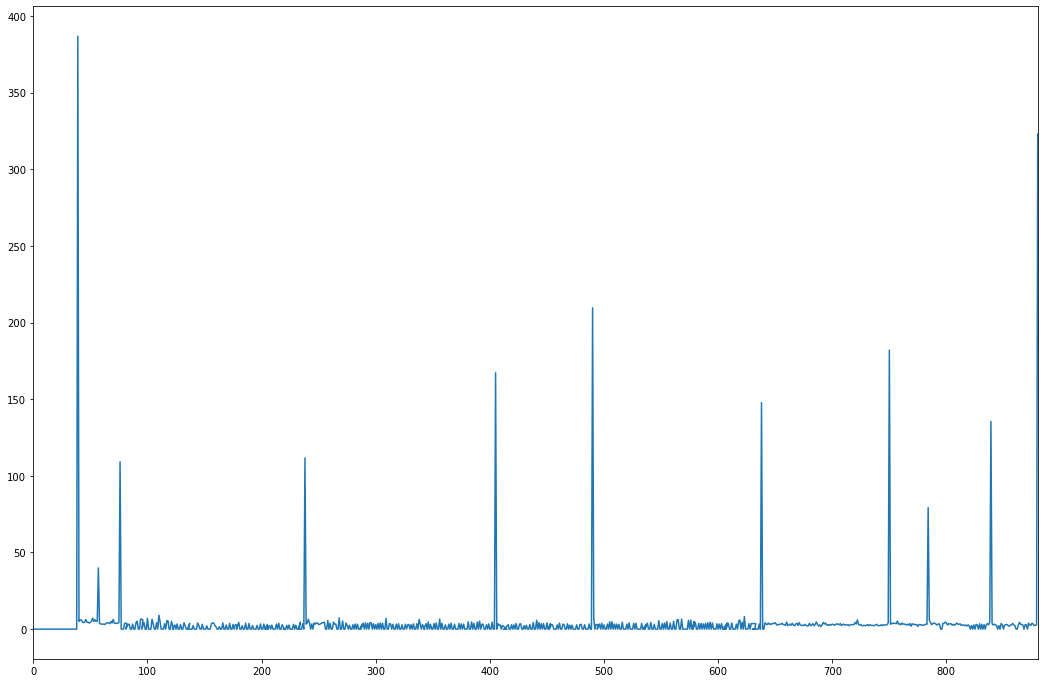

In [4]:
# create a new column, which contains the previous timestamp
df['prev_timestamp'] = df['time'].shift(1)

# fill the na's
df['prev_timestamp'] = df['prev_timestamp'].fillna(df.time.values[0])

# calculate the differences between the time and prev_timestamp in seconds
df['time'] = pd.to_datetime(df.time)
df['prev_timestamp'] = pd.to_datetime(df.prev_timestamp)
df['diff'] = (df['time'].astype(int) - df['prev_timestamp'].astype(int)) / 1000000000

#Show the results
display(Markdown('### New data frame'))
display(df.tail())

display(Markdown('### Biggest time differences '))
display(pd.DataFrame(df['diff'].sort_values(ascending=False)).head(15))

display(Markdown('### Timeseries'))
df['diff'].plot(figsize = (18,12))

# Download

If we've a look at the above image, we can see some clear spikes. These spikes are the bounds of our categories.   
When I was clicking on the items, I tried to wait a minimum of 60 seconds between a transition of two categories.  
Also, good to know, some items exist out of multiple images.   
  
*File structure*:
 - body
   - 1
    - 1.png 
   - 2
    - 1.png
   - 3
    - 1.png
    - 2.png
    - 3.png
 - eyes
  - 1
    - 1.png

In [5]:
# My categories and the order
categories = ['body','eyes','mouth','hair','shirt','trouser', 'hats', 'items', 'glasses', 'beards', 'pins', 'jewelry']

# helpers
categories_index = 0
item = 0


if False: # turn this one on :)
    
    # loop over the items
    for i, row in df.iterrows():

        # if the time differences between 2 items is larger then 15 second, then go to the next category and reset the item index
        if row['diff'] > 15:
            categories_index += 1
            item = 0
        
        # if the time difference between 2 items is less then 0.7 seconds, then those images belong to each other
        elif row['diff'] > 0.7:
            item += 1

        if categories_index >= 0 and item >= 0:
            
            # create a folder for the item and its category if it doesn't exist yet
            os.makedirs(f'images/{categories[categories_index]}/{item}', exist_ok=True)

            # download the the code bytes (image)
            r = requests.get(row['url'], timeout=2.5)
            
            # if the request was sueccesful
            if r.status_code == 200:
                
                #save the image as png
                with open(f'images/{categories[categories_index]}/{item}/{ len( os.listdir("images/"+ str(categories[categories_index]) +"/"+ str(item) ) ) }.png', 'wb') as f:
                    f.write(r.content)